# Homework 10
Ross Freeman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
v_max = 28
tb = 1
k = 0.2
T = 100

In [3]:
def brake_rule(t):
    return k * t * np.exp((tb - t) / tb)

## Forward Euler Method

In [4]:
def for_euler(t, h, res):
    ind = int(round(t / h))
    if(ind < res.size):
        return res[ind]
    else:
        return for_euler(t - h, h, res) - h*v_max*brake_rule(t-h)

In [5]:
def euler_wrap(h):
    euler_res = np.asarray([0])

    t = h
    step = 1
    while t < T:
        euler_res = np.append(euler_res, for_euler(t, h, euler_res))
        step += 1
        t = step * h

    return euler_res

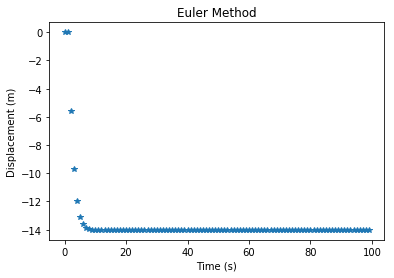

In [6]:
h = 1

plt.figure()
plt.title("Euler Method")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.plot(np.arange(0, 100, h), euler_wrap(h), '*')
plt.show()

In [7]:
num_res = np.asarray([0])

def num_approx(t):
    n = 1
    max_step = t / h
    result = 0
    
    while n < max_step:
        result += h/2 * (brake_rule(h * (n-1)) + brake_rule(h * n))
        n += 1
    return - v_max * result

In [8]:
t = h
step = 1
while t < T:
    num_res = np.append(num_res, num_approx(t))
    step += 1
    t = step * h


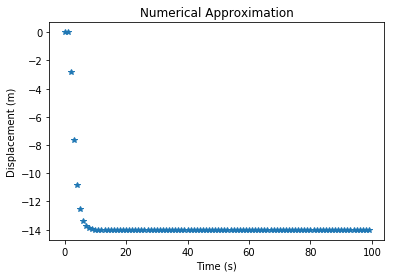

In [9]:
plt.figure()
plt.title("Numerical Approximation")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.plot(np.arange(0, 100, h), num_res, '*')
plt.show()

## Explicit Integration

In [10]:
exp_res = np.asarray([0])

t = h
step = 1
while t < T:
    int_val = -v_max * quad(brake_rule, 0, t)[0]
    exp_res = np.append(exp_res, int_val)
    step += 1
    t = step * h

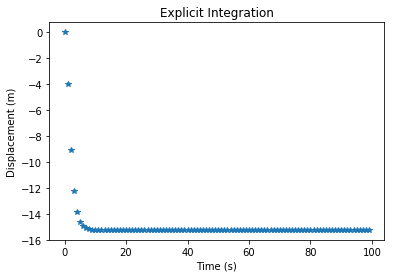

In [11]:
plt.figure()
plt.title("Explicit Integration")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.plot(np.arange(0, 100, h), exp_res, '*')
plt.show()

## Exercise 2

In [14]:
p_max = 40
d = 19
h = 0.01
num_cars = int(p_max / np.e)
tau = 1

car_matrix = euler_wrap(h).reshape(1, int(100/h)) # First car

curr_car = np.asarray([0])

def dde(car, t):
    if(t < 0):
        print(t, car, 0)
        return 0
#     if(car_matrix.ndim == 1 and car < 1): # Check if it's first iteration
#         print(t, car, car_matrix[ind])
#         return car_matrix[ind]
    elif(car < car_matrix.shape[0]): # See if previous car
        print(t, car, car_matrix[car][t])
        return car_matrix[car][t]
    elif(t < curr_car.size): # See if previous value
        print(t, car, curr_car[t])
        return curr_car[t]
    else:
        log = np.log(1 + p_max / np.e * (dde(car - 1, t - 1 - tau) - dde(car, t - 1 - tau)))
        prev = dde(car, t - 1)
        print(t, car, prev + h * v_max * log)
        print(prev, h, v_max, log)
        return prev + h * v_max * log

In [15]:
n_iter = int(T / h)

car = 1
while car < 2:    
    t = 1
    while t < n_iter:
        curr_car = np.append(curr_car, dde(car, t))
        print(curr_car)
        t += 1
        
    car_matrix = np.vstack((car_matrix, curr_car))
    car += 1
    curr_car = np.asarray([0])

-1 0 0
-1 1 0
0 1 0
1 1 0.0
0 0.01 28 0.0
[ 0.  0.]
0 0 0.0
0 1 0.0
1 1 0.0
2 1 0.0
0.0 0.01 28 0.0
[ 0.  0.  0.]
1 0 0.0
1 1 0.0
2 1 0.0
3 1 0.0
0.0 0.01 28 0.0
[ 0.  0.  0.  0.]
2 0 -0.00150709130452
2 1 0.0
3 1 0.0
4 1 -0.00627948323371
0.0 0.01 28 -0.0224267258347
[ 0.          0.          0.          0.         -0.00627948]
3 0 -0.00449128229548
3 1 0.0
4 1 -0.00627948323371
5 1 -0.0254245457216
-0.00627948323371 0.01 28 -0.0683752231711
[ 0.          0.          0.          0.         -0.00627948 -0.02542455]
4 0 -0.00892302898719
4 1 -0.00627948323371
5 1 -0.0254245457216
6 1 -0.0365341260117
-0.0254245457216 0.01 28 -0.0396770724646
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413]
5 0 -0.0147732290877
5 1 -0.0254245457216
6 1 -0.0365341260117
7 1 0.00423450680819
-0.0365341260117 0.01 28 0.145602260071
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451]
6 0 -0.0220132161337
6 1 -0.0365341260117

/Users/rossfreeman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


 0 -0.545281935891
30 1 nan
31 1 nan
32 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan]
31 0 -0.579112981376
31 1 nan
32 1 nan
33 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]
32 0 -0.613723883033
32 1 nan
33 1 nan
34 1 nan
nan 0.01

116 0 -4.88703612246
116 1 nan
117 1 nan
118 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         

178 1 nan
179 1 nan
180 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
     

259 0 -11.1077270719
259 1 nan
260 1 nan
261 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         

313 0 -12.4633557418
313 1 nan
314 1 nan
315 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         

367 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 

424 1 nan
425 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan   

478 1 nan
479 1 nan
480 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
     

nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         na

590 1 nan
591 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan   

648 0 -15.0468489551
648 1 nan
649 1 nan
650 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         

707 1 nan
708 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan   

766 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 

823 1 nan
824 1 nan
825 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
     

nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         na

963 0 -15.2115675908
963 1 nan
964 1 nan
965 1 nan
nan 0.01 28 nan
[ 0.          0.          0.          0.         -0.00627948 -0.02542455
 -0.03653413  0.00423451  0.05845797 -0.14289209         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.title("DDE")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.plot(np.arange(0, 100, h), car_matrix[0], '*')
plt.plot(np.arange(0, 100, h), car_matrix[1], '*')
# for row in car_matrix:
#     plt.plot(np.arange(0, 100, h), row, '*')
plt.show()

In [ ]:
print(car_matrix[0][8])
print(round(0.13999999999999999 / h))

test = np.asarray([0, 0, 0, 0, 0, 0])

t = 6
while(t < 100):
    res = test[t - 1] + h * v_max * np.log(1 + p_max/np.e * (car_matrix[0][t - 6] - test[t-6]))
    test = np.append(test, res)
    t += 1
print(test)